<a href="https://colab.research.google.com/github/neha-goyal55/EDA-Project/blob/main/Copy_of_EDA_Hotel_booking_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

#Hotels has been a thriving business in each and every country just for the experience that they provide us during our memorable travel but,running and maintaining it involves a lot of  cost and man-power. Thus analysing various factors and data has been vital in managing both the cost efficiency in boosting the profitability and managing the cost as well as managing the resources efficiently to serve the customers better.

#The main things that a customer will usually consider while booking a hotel will include prices per night, distance of hotel from attractions and restaurants, availability of free breakfasts, scenery in hotel room, cleaniness of hotel room and of course, availability of free wifi. In this dataset, we will explore different booking types in detail (i.e type of hotel, duration of stay, types of visitors, types of booking, etc).

# This data-set contains booking information about a city hotel and a resort hotel which includes vital information such as when the booking was made, length of stay, the number of adults, children and babies, the number of available parking spaces and various among other things. All personally identifying information has been removed from the data.

#We will perform an exploratory data analysis with python to get various insights from the data.


#Import Packages

**Lets import the dataset and packages**

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#reading the data
file_path = '/content/drive/MyDrive/Hotel Bookings.csv'
cp_df=pd.read_csv(file_path)

**Checking on the various fields in the data-set**

In [59]:
#check the columns
cp_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Checking on the Head and Tail of a Data**

In [60]:
# Data at glance
cp_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [61]:
cp_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


**Checking for the Shape and Data information**

In [62]:
# Checking the shape (rows and column numbers)
cp_df.shape

(119390, 32)

In [63]:
# Looking for data information
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Checking the Statistics of the Data**

In [64]:
# Checking the statistics of the data
cp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [65]:
# Making the copy of original data
df=cp_df.copy()


**Checking the Unique values to perform the Analysis**

In [66]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(df.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df[col].unique())}')

Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']


**Checking for Duplicate Data and Cleaning the Data**

In [67]:
# Cleaning the Data 
#Checking the shape of duplicate data

df[df.duplicated()].shape 

(31994, 32)

In [68]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)

**Checking for the Null Values and Missing Data**

In [69]:
# Cheking the new shape of the data
df.shape

(87396, 32)

In [70]:
# Finding null values
df.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


**Handling the Missing Data to obtain a clean data for analysis**

In [71]:
# Handling Missing data

missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
missing_data.columns = ['No. of Missing Data', '% Missing Data']
missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


#Information of the missing Values in different rows

0.0045% of the rows(4) has missing data in the Children column 

0.5172% of the rows(452) has missing data in the Country column

13.9514% of the rows(12193) has missing data in the Agent column

93.9825% of the rows(82137) has missing data in the Company column



In [72]:
df['children'].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

Most booking had no children and hence we will fill the missing rows for the children with 0



In [73]:
df['children'].fillna(0,inplace=True)

0.5% of rows have missing data in country column. Now we will look at the distribution of this missing information.

In [74]:
country_data = pd.DataFrame([df['country'].value_counts(),df['country'].value_counts()*100/df.shape[0]]).T
country_data.columns = ['Count', '% Distribution']
country_data

,Count,% Distribution
PRT,27453.0,31.412193
GBR,10433.0,11.937617
FRA,8837.0,10.111447
ESP,7252.0,8.297863
DEU,5387.0,6.163898
...,...,...
MMR,1.0,0.001144
BFA,1.0,0.001144
CYM,1.0,0.001144
MLI,1.0,0.001144


As country,agent and company has null values,so we are replacing their name.

In [75]:
df['country'].fillna('others',inplace=True)

In [76]:
df['agent'].fillna('self_booked',inplace=True)
df ['company'].fillna('self_booked',inplace=True)

Since the Company column has more than 90% of the data missing, we will not be able to perform any analysis based on the company as the data is insufficient

# Let's confirm all missing data have been handled

In [77]:
missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
missing_data.columns = ['No. of Missing Data', '% Missing Data']
missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.0
is_canceled,0.0,0.0
lead_time,0.0,0.0
arrival_date_year,0.0,0.0
arrival_date_month,0.0,0.0
arrival_date_week_number,0.0,0.0
arrival_date_day_of_month,0.0,0.0
stays_in_weekend_nights,0.0,0.0
stays_in_week_nights,0.0,0.0
adults,0.0,0.0


#Adding new coulmns for further analysis 

In [78]:
# Lets add some new columns

df['total_people'] = df['adults'] + df['babies'] + df['children']   
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']   

# Exploratory Data Analysis 

#1. Which hotel is prefered by the guest?
Let’s answer our first question, how many bookings were made for each type of hotel.



In [79]:
print(df['hotel'].value_counts())


City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64


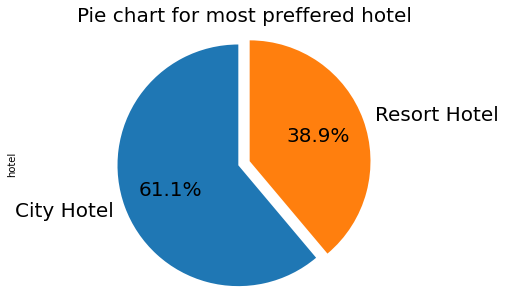

In [80]:
df['hotel'].value_counts().plot.pie(explode=(0.1,0.0), startangle=90, autopct='%1.1f%%',figsize=(8,5),fontsize=20)
plt.axis('equal')
plt.title ('Pie chart for most preffered hotel',fontsize=20)
plt.show()

# What do we see here?

*It seems that a huge proportion of hotels booked were city hotel. Resort hotel tend to be on the expensive side and most people will just stick with city hotel.

*Also, resort hotels tend to be appropriate for larger group of people. Let's have an overview of the number of people who booked the hotel.

#2. Best time of each year for the hotels where maximum bookings takes place

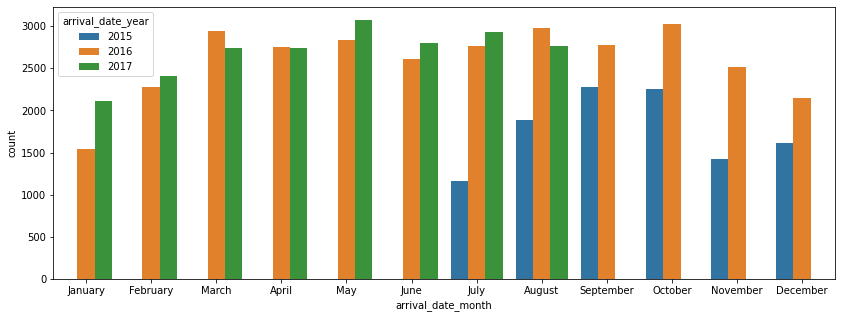

In [81]:
plt.figure(figsize=(14,5))
sns.countplot(data= df[df['is_canceled']==0],
              x = 'arrival_date_month',
              hue = 'arrival_date_year',
            
              order= ['January','February','March','April','May','June','July','August','September','October','November','December']);

#INFERENCE


---


1.   Booking data is available from July 2015 to August 2017 

2. From the chart it is clearly evident that the bookings have increased rapidly in 
2016 compared to 2015 and in 2017 it has almost maintained the same number of bookings as in 2016

3. Considering the bookings year wise we can conclude that the month of May has the highest bookings in 2017 similarly in 2015 the months of September & October has the highest bookings and in 2016 the months of October & March has the highest bookings.







#3. From which country the hotels gets the maximum bookings 

In [82]:
country_data = pd.DataFrame([df['country'].value_counts(),df['country'].value_counts()*100/df.shape[0]]).T
country_data.columns = ['Count', '% Distribution']
country_data

,Count,% Distribution
PRT,27453.0,31.412193
GBR,10433.0,11.937617
FRA,8837.0,10.111447
ESP,7252.0,8.297863
DEU,5387.0,6.163898
...,...,...
MMR,1.0,0.001144
BFA,1.0,0.001144
CYM,1.0,0.001144
MLI,1.0,0.001144


In [83]:
country_data.head(10).sum()

Count             71431.000000
% Distribution       81.732574
dtype: float64

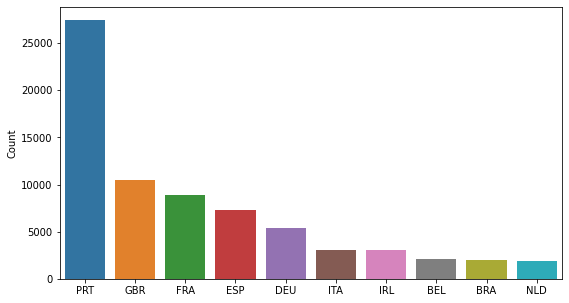

In [84]:
plt.figure(figsize=(9,5))
sns.barplot(data=country_data[:10],
            x= country_data[:10].index,
            y='Count'
            );
            

# INFERENCE



---
1. Here we can observe that the country 'PRT' (Portugal)
accounts for the maximum no. of bookings.Almost 32% of the bookings comes from 'PRT'(Portugal).While,the second highest no.of bookings is from 'GBR'(Great Britain) which accounts to almost 12% which inturn is approximately two and half times less than that of 'PRT'(Portugal) contribution. Thus the customers from Portugal has a great dominance in this data-set

2.  Almost 82% of the bookings comes from the Top 10 Countries in which 9 countries belongs to the European Union (EU). Hence most of the customers are Europeans.









#4. Which Distribution channel is mostly used for hotel booking?

In [85]:
label=df['distribution_channel'].value_counts()
print(label)

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64


Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

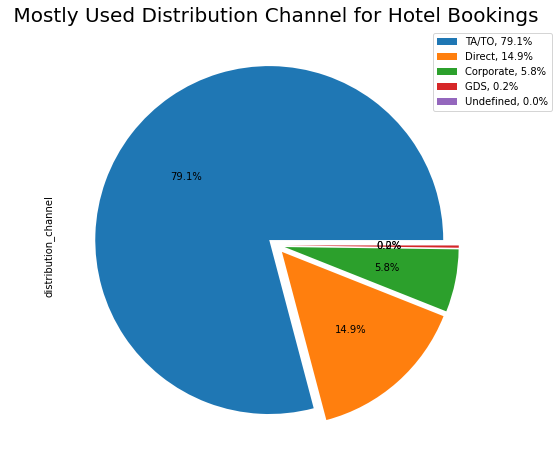

In [86]:
# Visualizsing the by pie chart.

labels=df['distribution_channel'].value_counts().index.tolist()

distribution_channel_df=df['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/df.shape[0],1)

sizes=distribution_channel_df['percentage'].values.tolist()
df['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05],autopct='%1.1f%%', shadow=False, figsize=(15,8),fontsize=10,labels=None)   

labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ',fontsize=20)

# INFERENCE



---
1. Here we can observe that the 'TA/TO' distribution channel
accounts for the maximum no. of bookings.Almost 79% of the bookings comes from 'TA/TO' distribution channel and the second highest distribution channel is 'Direct' which accounts to almost 15% of the bookings.










#5. Most demanded meal type by most customer of hotel booking

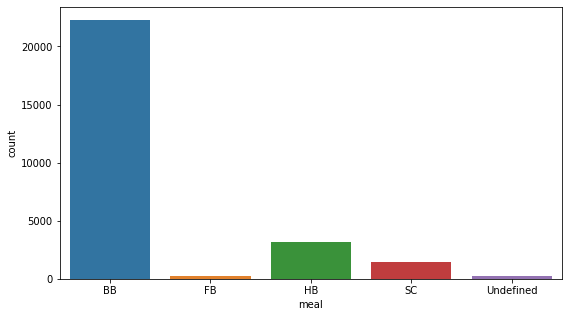

In [87]:
plt.figure(figsize=(9,5))
sns.countplot(data=df[df['country']=='PRT'],
              x='meal');

From the above chart it seems BB (Bed and Breakfast) is the preffered meal type.

#6. Customer type and their contribution to the bookings?

In [88]:
df['customer_type'].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

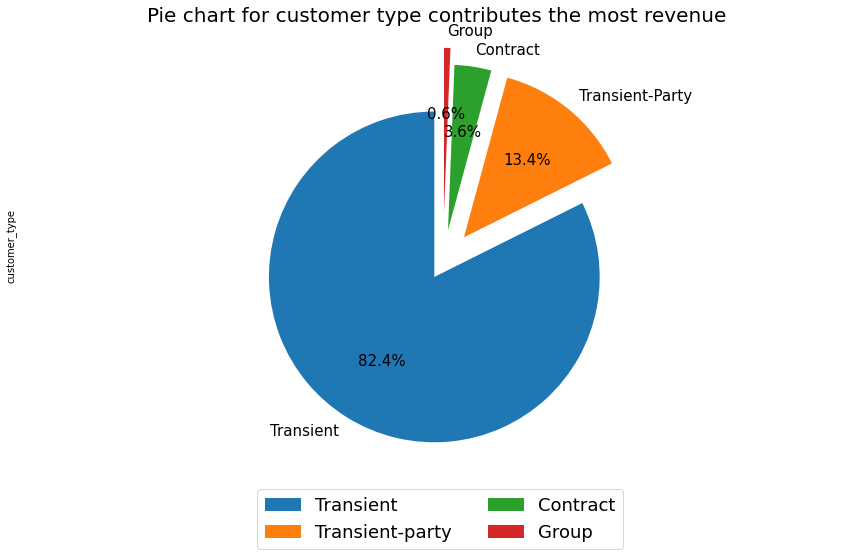

In [89]:
df['customer_type'].value_counts().plot.pie(explode=(0.1,0.2,0.2,0.3), startangle=90, autopct='%1.1f%%',figsize=(15,8),fontsize=15 )

plt.axis('equal')
plt.title ('Pie chart for customer type contributes the most revenue ',fontsize=20)

plt.legend(labels=['Transient','Transient-party','Contract','Group'], fontsize=18, loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.show()

Customer type 'Transient' contributes the maximum bookings.

#Also hotel wise contribution by customer type.

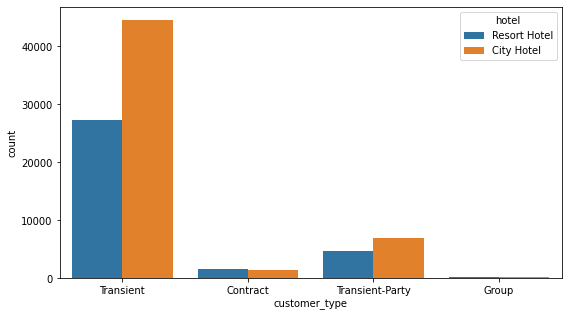

In [90]:
plt.figure(figsize =(9,5))
sns.countplot(data=df,
              x='customer_type',
              hue='hotel');

# INFERENCE



---
1. From the above graphs we can clearly come to conclusion that 'Transient' customers contributes the majority of the bookings with approximately 83% of the total bookings and the majority of this bookings goes towards the City Hotel type.

2.  In 'Transient' and 'Transient-Party' the bookings of the City hotel type is greater than that of the Resort type,while in 'Contract' and 'Group' the bookings among both the hotel types are almost same 









#7. What are the major reasons that a customer cancel his booking?

#Exploring the reason of the cancellation:
#1. Booking changes
#2. Days in waiting list
#3. Whether the guest is repeated or the first timer

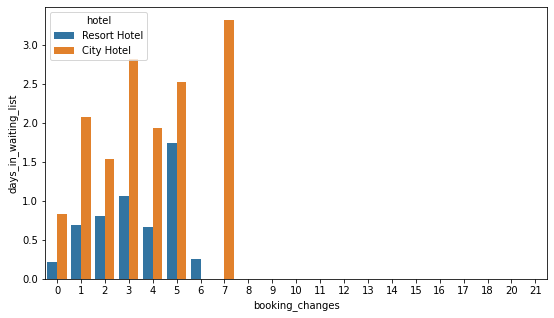

In [91]:
plt.figure(figsize= (9,5))
sns.barplot(data= df,
            x= 'booking_changes',
            y = 'days_in_waiting_list',
            hue = 'hotel',ci = None);

#What is the pecentage of booking cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

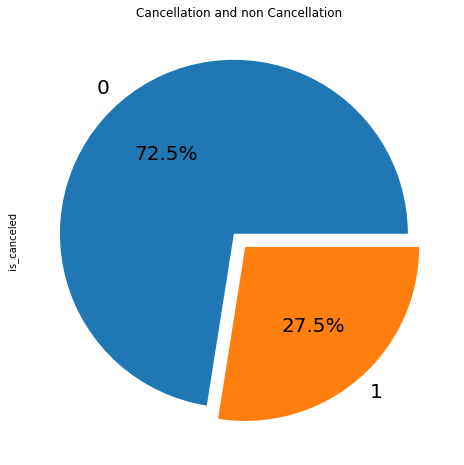

In [92]:
df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

###As we can see from the above chart
### 0= not cancled
### 1= canceled

### 27.5 % of the bookings were cancelled.

#8. Which agent gives us the maximum booking?

In [93]:
agent_dat = pd.DataFrame([df['agent'].value_counts(),df['agent'].value_counts()*100/df.shape[0]]).T
agent_dat.columns = ['Count', '% Distribution']
print(agent_dat.head(10).sum())
agent_dat

Count             69169.000000
% Distribution       79.144354
dtype: float64


,Count,% Distribution
9.0,28759.0,32.906540
240.0,13028.0,14.906861
self_booked,12193.0,13.951439
14.0,3349.0,3.831983
7.0,3300.0,3.775917
...,...,...
257.0,1.0,0.001144
291.0,1.0,0.001144
93.0,1.0,0.001144
483.0,1.0,0.001144


In [94]:

highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

highest_bookings.drop(highest_bookings[highest_bookings['agent']=='self_booked'].index,inplace=True) 

top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
8,9.0,28759
173,240.0,13028
13,14.0,3349
6,7.0,3300
182,250.0,2779
174,241.0,1644
26,28.0,1502
7,8.0,1383
0,1.0,1232
5,6.0,1117


In [95]:
highest_bookings= df.groupby(['agent','hotel'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

highest_bookings.drop(highest_bookings[highest_bookings['agent']=='self_booked'].index,inplace=True) 

top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,hotel,Most_Bookings
14,9.0,City Hotel,28753
221,240.0,Resort Hotel,13020
22,14.0,City Hotel,3349
11,7.0,City Hotel,3300
232,250.0,Resort Hotel,2778
222,241.0,Resort Hotel,1644
38,28.0,City Hotel,1502
0,1.0,City Hotel,1226
12,8.0,City Hotel,1118
55,40.0,Resort Hotel,954


Text(0.5, 1.0, 'Most Bookings Made by the agent')

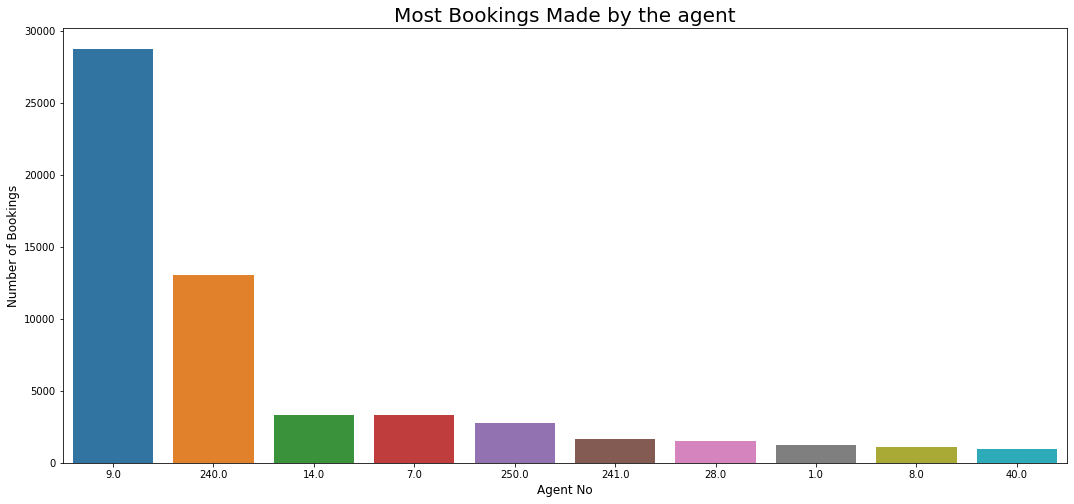

In [96]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No',fontsize=12)
plt.ylabel('Number of Bookings',fontsize=12)
plt.title("Most Bookings Made by the agent",fontsize=20)


As we can see from the above data Agent ID '9' gives us the maximum bookings.This is with respect to agent.

# INFERENCE



---
1. From the above graphs we can clearly come to conclusion that 'Agent 9' gives the maximum bookings contributing to approximately 33% of the bookings while the second most contribution is made by 'Agent 240' who provides approximately 15% of the total bookings. One of the key analysis was that 'Agent 9' provided almost all his bookings towards City Hotel while 'Agent 240' provided almost all his bookings towards Resort Hotel.










#9. ?

#10. Which customer type contributes the highest avg ADR?

---



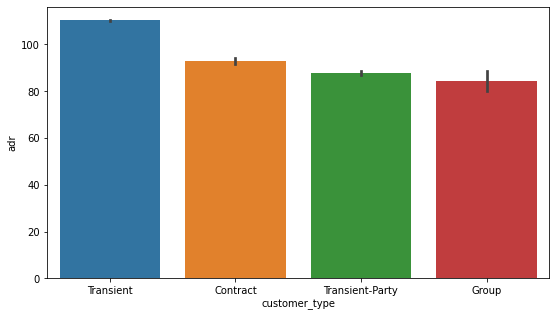

In [97]:
plt.figure(figsize=(9,5))
sns.barplot(data=df,
            x='customer_type',
            y='adr');

From the above graph it shows 'Transient' customer_type contributes the most revenue.

#11. What is the percentage distribution of required_car_parking_spaces?

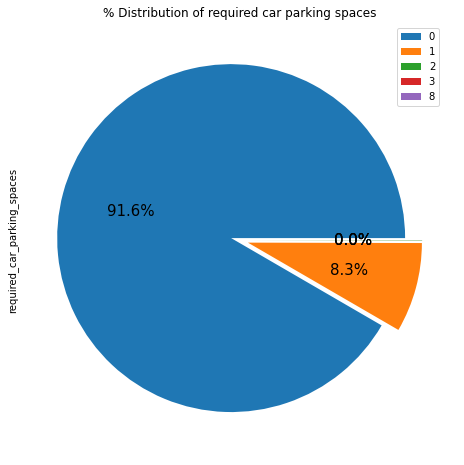

In [98]:
df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# INFERENCE



---
1. From the above graphs it is clearly visible that 91.6 % guests did not require parking space.
 
 Only 8.3 % guests required only 1 parking space.











# 12.What is the Optimal stay length in both types of hotels ?

In [99]:
stay = df.groupby(['total_stay','hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns
stay

,total_stay,hotel,Number of stays
0,0,City Hotel,288
1,0,Resort Hotel,363
2,1,City Hotel,10284
3,1,Resort Hotel,6900
4,2,City Hotel,10824
...,...,...,...
71,49,City Hotel,1
72,56,Resort Hotel,2
73,57,City Hotel,1
74,60,Resort Hotel,1


In [100]:
stay1 = df.groupby(['total_stay','arrival_date_year']).agg('count').reset_index()   # group by total stay and hotel
stay1 = stay1.iloc[:, :3]                                                   # take 1st 3 columns
stay1 = stay1.rename(columns={'hotel':'Number of stays'})    # rename the columns
stay1

,total_stay,arrival_date_year,Number of stays
0,0,2015,149
1,0,2016,372
2,0,2017,130
3,1,2015,2593
4,1,2016,8917
...,...,...,...
102,49,2016,1
103,56,2017,2
104,57,2016,1
105,60,2015,1


Text(0.5, 0, 'total_stay(days)')

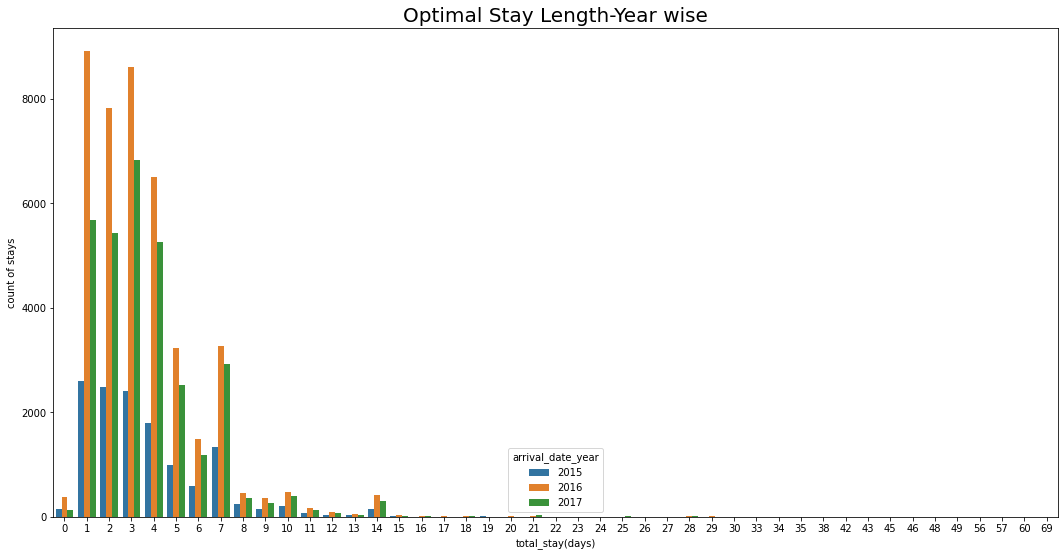

In [101]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='arrival_date_year',data=stay1)

#set labels
plt.title('Optimal Stay Length-Year wise',fontsize=20)
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

Text(0.5, 0, 'total_stay(days)')

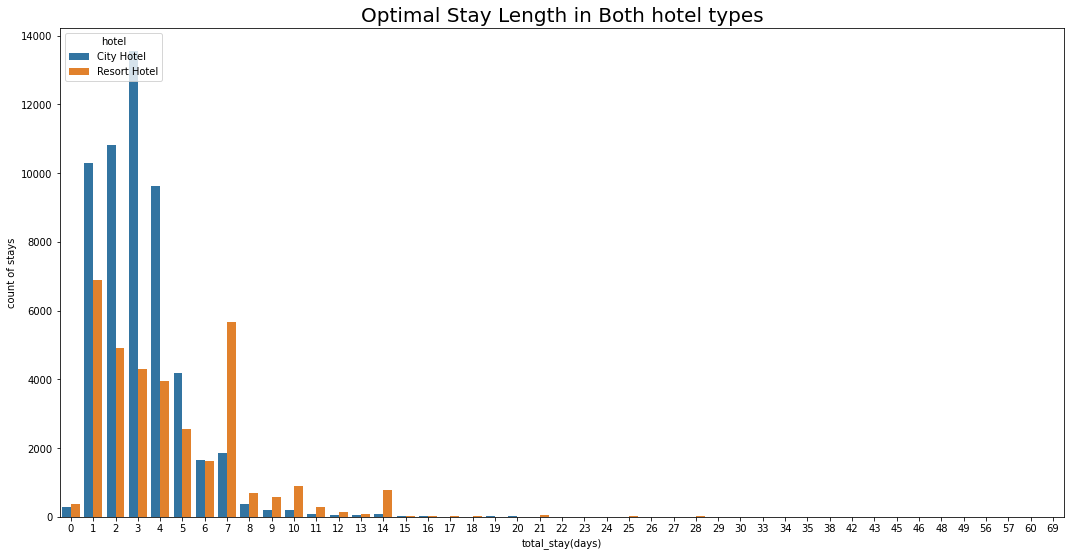

In [102]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types',fontsize=20)
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')


Optimal stay in both the type hotel is less than 7 days

# INFERENCE



---
1. From the above graphs it is evidently visible that for most of the customers who stayed less than 6 days preferred the City hotels while people staying more than 6 days preferred the Resort hotels.
2. The City hotel had the highest bookings amongst the customers who stayed for 3 days but for the Resort hotel it was by the customers who stayed for 1day 
3. In Majority of the bookings in both City nad Resort hotels, the customer preferred a stay that is 7 days or lesser











#13. ADR relationship with total number of people

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'ADR v/s Total Number of people')

<Figure size 1224x576 with 0 Axes>

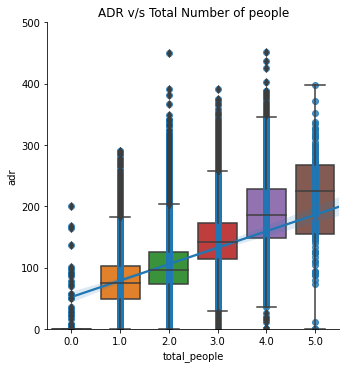

In [103]:
plt.figure(figsize=(17,8))
df1=df[df['total_people'] < 6]
a_plot = sns. lmplot('total_people','adr', df)
a_plot. set(xlim=(0, 50))
a_plot. set(ylim=(0, 500))



sns.boxplot(x=df1['total_people'],y=df1['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

###As the  total number of people increases adr also increases.
###Thus adr and total people are directly proportional to each other.

#14. ADR across different  market segment


In [104]:

Grupby=df.groupby(['market_segment','hotel',"is_canceled"])['adr'].mean().reset_index()
Grupby

,market_segment,hotel,is_canceled,adr
0,Aviation,City Hotel,0,100.077912
1,Aviation,City Hotel,1,100.544444
2,Complementary,City Hotel,0,2.831360
3,Complementary,City Hotel,1,2.075965
4,Complementary,Resort Hotel,0,4.390127
5,Complementary,Resort Hotel,1,1.209677
6,Corporate,City Hotel,0,81.748635
7,Corporate,City Hotel,1,89.671629
8,Corporate,Resort Hotel,0,49.484462
9,Corporate,Resort Hotel,1,68.510935


Text(0.5, 1.0, 'Adr across market segment')

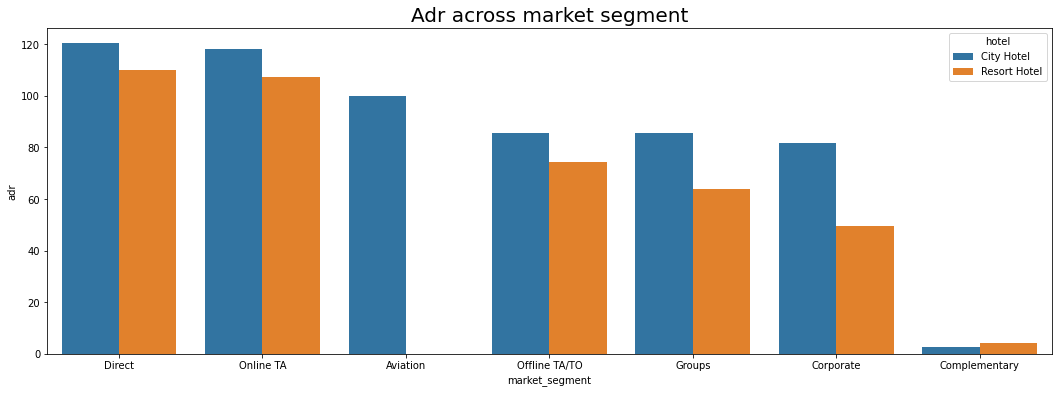

In [105]:
Grupby=df[df['is_canceled']==0].groupby(['market_segment','hotel'])['adr'].mean().reset_index()   # group by

# set plot size and plto barchart
plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment',fontsize=20)

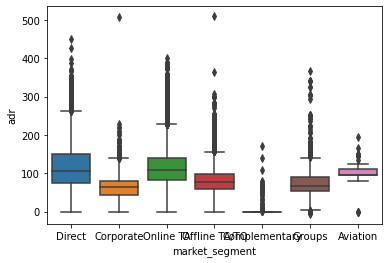

In [106]:
sns.boxplot(data=df[df['is_canceled']==0], x= 'market_segment', y='adr')


### 'Direct' and 'Online TA' are contributing the most in both types of hotels.
### Aviation segment should focus on increasing the bookings of 'City Hotel'


# INFERENCE



---
1. From the above graphs we can clearly come to conclusion that 'Direct' and 'Online TA' market segments contributes the majority of the bookings in both  City Hotel and Resort Hotel types and the average ADR for both is around 120

2.  In 'offline TA/TO', 'Corporate' and 'Groups' the bookings of the City hotel type ADR which averages around 80 is greater than that of the Resort type which averages around 65
3. The 'Aviation' segment only provides bookings for City hotel type with an average ADR of about 100









#15. Lets plot the heatmap and see the co-relation 

Text(0.5, 1.0, 'Co-relation of the columns')

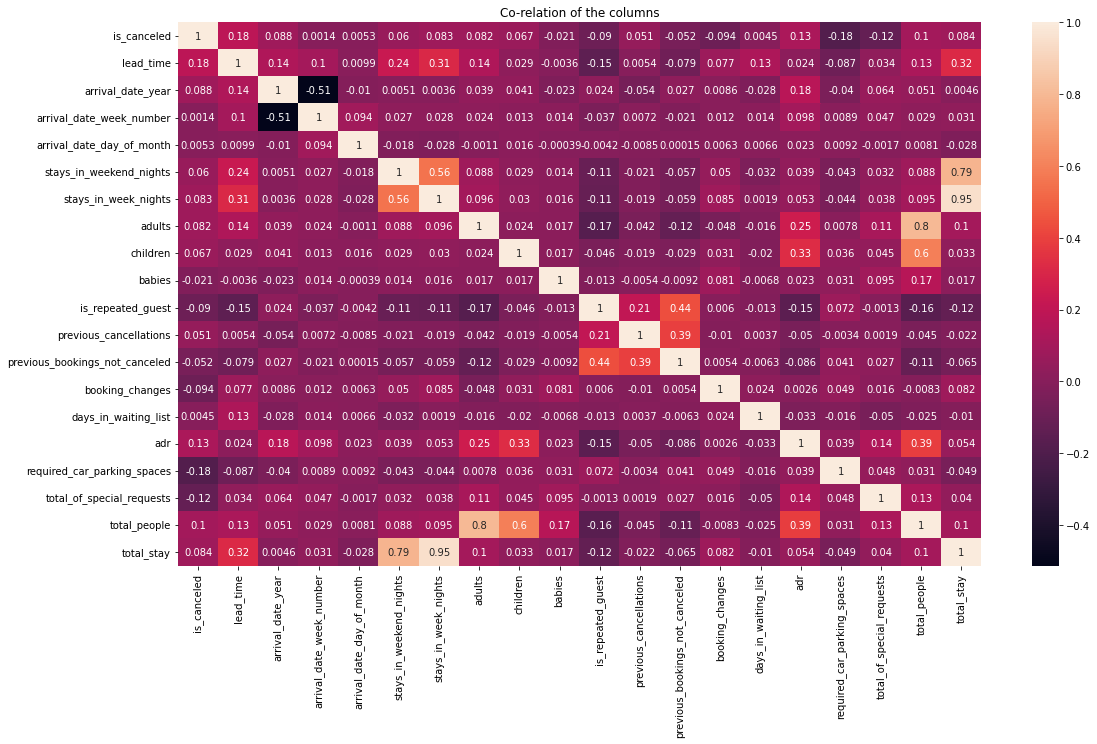

In [107]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')

## ***Conclusions:***

1.	City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.
2. Best time of each year for the hotels where maximum bookings takes place are:

  2015-September and October

  2016- October and March

  2017- May
3.	Maximum number of guests were from Portugal, i.e. more than 25000 guests.
4.	79.1 % bookings were made through TA/TO (travel agents/Tour operators).
5.	BB( Bed & Breakfast) is the most preferred  type of meal by the guests.
6. Customer type 'Transient' contribuites the maximum booking with the percentage of 82.4 
7. 27.5 % bookings were got cancelled out of all the bookings.
8. Agent ID '9' gives us the maximum booking i.e.28759 
9. Company ID 'Self_booked' gives us the maximum booking i.e. 82137 
10. 
11.	Most of the customers (91.6%) do not require car parking spaces.
12. Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.
13. 
14. In Market Segment the	Average ADR for city hotel is high as compared to resort hotels These City hotels are generating more revenue than the resort hotel.
15. Co-relation across the different column

